# 3. API를 이용한 데이터 수집

이번 장에서 부터는 본격적으로 데이터를 수집하는 방법을 배우겠습니다. 먼저 API를 이용해 데이터를 수집하는 방법을 살펴봅니다.

API 제공자는 본인이 가진 데이터베이스를 다른 누군가가 쉽게 사용할 수 있는 형태로 가지고 있으며, 해당 데이터베이스에 접근할 수 있는 열쇠인 API 주소를 가진 사람은 이를 언제든지 사용할 수 있습니다.

```{figure} image/03_api.png
---
name: 03_api
---
API 개념
```

API는 API 주소만 가지고 있다면 데이터를 언제, 어디서, 누구나 쉽게 이용할 수 있다는 장점이 있습니다. 또한 대부분의 경우 사용자가 필요한 데이터만을 가지고 있으므로 접속 속도가 빠르며, 데이터를 가공하는 번거로움도 줄어듭니다. 해외에는 금융 데이터를 API의 형태로 제공하는 업체가 많으므로, 이를 잘만 활용한다면 매우 손쉽게 퀀트 투자에 필요한 데이터를 수집할 수 있습니다.

## 3.1 API를 이용한 Quandl 데이터 다운로드

데이터 제공업체 Quandl은 일부 데이터를 무료로 제공하며 API를 통해서 다운로드할 수 있습니다. 이 책에서는 예제로 애플(AAPL)의 주가를 다운로드 해보겠습니다. csv 형식의 API 주소는 다음과 같습니다.

```
https://www.quandl.com/api/v3/datasets/WIKI/AAPL/data.csv?api_key=xw3NU3xLUZ7vZgrz5QnG
```

위 주소를 웹 브라우저 주소 창에 직접 입력하면 csv 형식의 파일이 다운로드되며, 파일을 열어보면 애플의 주가 데이터가 있습니다.

```{figure} image/03_apple_csv.png
---
name: 03_apple_csv
---
API 주소를 이용한 데이터 다운로드
```

그러나 웹 브라우저에 해당 주소를 입력해 csv 파일을 다운로드하고 csv 파일을 다시 파이썬에서 불러오는 작업은 무척이나 비효율적입니다. 파이썬에서 API 주소를 이용해 직접 데이터를 다운로드 하겠습니다.

In [1]:
import pandas as pd

url_aapl = 'https://www.quandl.com/api/v3/datasets/WIKI/AAPL/data.csv?api_key=xw3NU3xLUZ7vZgrz5QnG'
data_aapl = pd.read_csv(url_aapl)

data_aapl.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0
1,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
3,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
4,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0


url에 해당 주소를 입력한 후 pandas의 `read_csv()` 함수를 이용해 간단하게 csv 파일을 불러올 수 있습니다.

## 3.2 DataReader() 함수를 데이터 다운로드

이전 예에서 API 주소를 이용하면 매우 간단하게 데이터를 수집할 수 있음을 살펴보았습니다. 그러나 이 방법에는 단점도 있습니다. 먼저 원하는 항목에 대한 API를 일일이 얻기가 힘듭니다. 또한 Quandl의 경우 무료로 얻을 수 있는 정보에 제한이 있으며, 다운로드 양에도 제한이 있습니다. 이 방법으로 한두 종목의 데이터를 수집할 수 있지만, 전 종목의 데이터를 구하기는 사실상 불가능합니다.

다행히 야후 파이낸스 역시 주가 데이터를 무료로 제공하며, pandas_datareader 패키지의 `DataReader()` 함수는 해당 API에 접속해 데이터를 다운로드합니다.

### 3.2.1 주가 다운로드

`DataReader()` 함수의 기본적인 사용법은 매우 간단합니다. 괄호 안에 다운로드하려는 종목의 티커와, 데이터 소스를 입력합니다.

In [4]:
import pandas_datareader as web

AAPL = web.DataReader('AAPL', 'yahoo')
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-11,27.652500,27.207500,27.242500,27.254999,117630000.0,25.350115
2016-04-12,27.625000,27.165001,27.334999,27.610001,108929200.0,25.680305
2016-04-13,28.084999,27.700001,27.700001,28.010000,133029200.0,26.052345
2016-04-14,28.097500,27.832500,27.905001,28.025000,101895600.0,26.066298
2016-04-15,28.075001,27.432501,28.027500,27.462500,187756000.0,25.543112


In [5]:
type(AAPL)

pandas.core.frame.DataFrame

먼저 `DataReader()` 함수 내에 애플의 티커인 AAPL과 데이터 소스인 yahoo를 입력합니다. 주가 데이터가 DataFrame 형태로 다운로드 됩니다.

다운로드 결과로 총 6개의 열이 생성됩니다. High는 고가, Low는 저가, Open은 시가, Close는 종가를 의미합니다. 또한 Volume은 거래량을 의미하며, Adjusted는 배당이 반영된 수정주가를 의미합니다. 이 중 가장 많이 사용되는 데이터는 Adjusted, 즉 배당이 반영된 수정주가입니다.

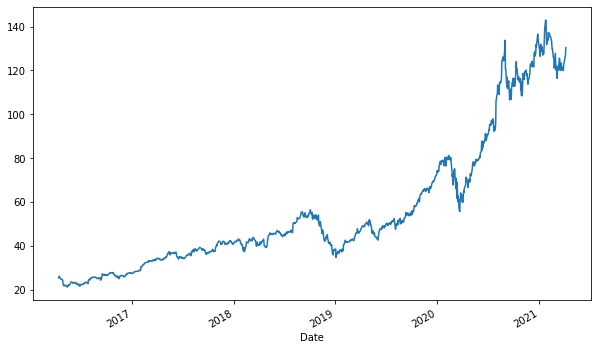

In [8]:
import matplotlib.pyplot as plt

AAPL['Adj Close'].plot(figsize=(10, 6))
plt.show()

수정주가에 해당하는 Adj Close 열을 선택한 후 시계열 그래프를 그릴 수도 있습니다. 시계열 기간을 입력하지 않으면 2016년부터 현재까지의 데이터가 다운로드되며, 입력 변수를 추가하여 원하는 기간의 데이터를 다운로드할 수도 있습니다.

In [9]:
AAPL_long = web.DataReader('AAPL', 'yahoo', start = '2000-01-01', end = '2010-12-31')

AAPL_long.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.790705
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.860883
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.788302
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.799837
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.730621


In [11]:
AAPL_long.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-27,11.622857,11.482857,11.530357,11.595714,249816000.0,9.988124
2010-12-28,11.666429,11.609286,11.639643,11.623929,175924000.0,10.012430
2010-12-29,11.658929,11.610714,11.650714,11.617500,163139200.0,10.006890
2010-12-30,11.625357,11.537500,11.624286,11.559286,157494400.0,9.956747
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.922909


start에는 시작시점을 입력하고 end에는 종료시점을 입력하면 해당 기간의 데이터가 다운로드됩니다.

한 번에 여러 종목의 주가를 다운로드할 수도 있습니다. 위 예제와 같이 페이스북과 엔비디아의 티커인 FB와 NVDA를 tickers 변수에 입력하고 `for loop` 구문을 이용하면 두 종목의 주가가 순차적으로 다운로드됩니다.

In [12]:
tickers = ['FB', 'NVDA']

all_data = {}
for ticker in tickers:
    all_data[ticker] = web.DataReader(ticker, 'yahoo')
    
all_data    

{'FB':                   High         Low        Open       Close    Volume  \
 Date                                                                   
 2016-04-11  110.910004  108.769997  110.699997  108.989998  39762300   
 2016-04-12  111.160004  108.989998  109.339996  110.610001  26248100   
 2016-04-13  112.650002  106.519997  112.230003  110.510002  88227400   
 2016-04-14  112.040001  110.260002  110.620003  110.839996  28473300   
 2016-04-15  110.970001  109.199997  110.790001  109.639999  20922800   
 ...                ...         ...         ...         ...       ...   
 2021-04-01  302.399994  296.600006  298.399994  298.660004  17590700   
 2021-04-05  310.769989  300.679993  300.890015  308.910004  28237000   
 2021-04-06  311.350006  305.250000  308.839996  306.260010  17335200   
 2021-04-07  314.250000  305.500000  306.339996  313.089996  22855200   
 2021-04-08  315.880005  310.049988  314.850006  313.019989  20860700   
 
              Adj Close  
 Date            

### 3.2.2 국내 종목 주가 다운로드

`DataReader()` 함수를 이용하면 미국뿐 아니라 국내 종목의 주가도 다운로드할 수 있습니다. 국내 종목의 티커는 총 6자리로 구성되어 있으며, 해당 함수에 입력되는 티커는 **코스피 상장 종목의 경우 티커.KS, 코스닥 상장 종목의 경우 티커.KQ**의 형태로 입력해야 합니다.

다음은 코스피 상장 종목인 삼성전자 데이터의 다운로드 예시입니다.

In [13]:
samsung = web.DataReader('005930.KS', 'yahoo')

samsung['Adj Close'].tail()

Date
2021-04-05    85400.0
2021-04-06    86000.0
2021-04-07    85600.0
2021-04-08    84700.0
2021-04-09    83600.0
Name: Adj Close, dtype: float64

삼성전자의 티커인 005930에 .KS를 붙여 `DataReader()` 함수에 입력하면 국내 종목 역시 데이터가 다운로드 됩니다. 야후 파이낸스의 경우 국내 종목은 종종 수정주가에 오류가 발생하는 경우가 많아서 배당이 반영된 값보다는 단순 종가(Close) 데이터를 사용하기를 권장합니다. 단순 종가를 사용할 경우 비록 배당을 고려할 수는 없지만, 전반적으로 오류가 없는 데이터를 사용할 수 있습니다.

In [16]:
samsung['Close'].tail()

Date
2021-04-05    85400.0
2021-04-06    86000.0
2021-04-07    85600.0
2021-04-08    84700.0
2021-04-09    83600.0
Name: Close, dtype: float64

다음은 코스닥 상장종목인 셀트리온제약의 예시이며, 티커인 068670에 .KQ를 붙여 함수에 입력합니다. 역시나 데이터가 다운로드 됩니다.

In [15]:
cell_pharm = web.DataReader('068760.KQ', 'yahoo')

cell_pharm['Close'].tail()

Date
2018-01-26     97400.0
2018-01-29     99900.0
2018-01-30     99500.0
2018-01-31     97500.0
2021-04-09    143700.0
Name: Close, dtype: float64

### 3.2.3 FRED 데이터 다운로드

미국 연방준비은행에서 관리하는 Federal Reserve Economic Data(FRED)는 미국 및 각국의 중요 경제지표 데이터를 살펴볼 때 가장 많이 참조되는 곳 중 하나이며, 역시나 `DataReader()` 함수를 이용해 FRED 데이터를 다운로드할 수 있습니다. 먼저 미 국채 10년물 금리를 다운로드하는 예제를 살펴보겠습니다.

In [21]:
import pandas_datareader as web

data = web.DataReader('DGS10', 'fred', '1960-01-01')
data.head()

,DGS10
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


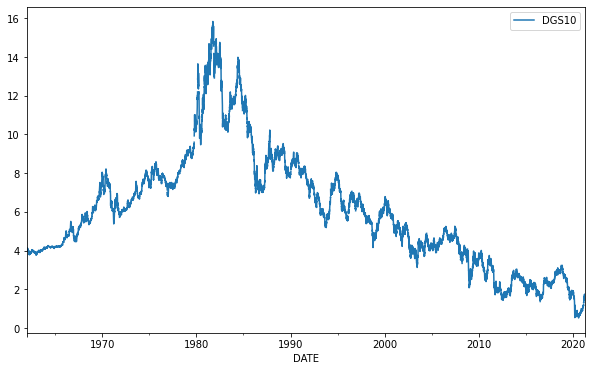

In [22]:
import matplotlib.pyplot as plt

data.plot(figsize=(10, 6))
plt.show()

`DataReader()` 함수 내에 미 국채 10년물 금리에 해당하는 티커인 DGS10을 입력하면, FRED에서 제공하는 API를 이용해 데이터가 다운로드됩니다.

각 항목별 티커를 찾는 방법은 매우 간단합니다. 먼저 FRED 웹사이트(https://fred.stlouisfed.org/) 에서 원하는 데이터를 검색합니다. 만일 원/달러 환율에 해당하는 티커를 찾고자 한다면 {numref}`03_api_fred`와 같이 이에 해당하는 South Korea / U.S. Foreign Exchange Rate를 검색해 원하는 페이지에 접속합니다. 이 중 페이지 주소에서 **/series/ 다음에 위치하는 DEXKOUS**가 해당 항목의 티커입니다.

```{figure} image/03_api_fred.png
---
name: 03_api_fred
---
FRED 사이트 내 원/달러 환율의 티커 확인
```

In [23]:
fx = web.DataReader('DEXKOUS', 'fred', '1960-01-01')
fx.tail()

,DEXKOUS
DATE,
2021-03-29,1133.57
2021-03-30,1133.44
2021-03-31,1126.72
2021-04-01,1131.63
2021-04-02,1127.30


해당 티커를 입력하면, FRED 웹사이트와 동일한 데이터가 다운로드됩니다. 이 외에도 509,000여 개의 방대한 FRED 데이터를 해당 함수를 통해 손쉽게 다운로드할 수 있습니다.

```{note}
이 외에도 `DataReader()` 함수를 이용할 경우 다양한 곳의 데이터를 손쉽게 수집할 수 있습니다. 자세한 내용은 아래 사이트를 참조하시기 바랍니다.

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
```